In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Reading Data with Pandas
data=pd.read_csv('heart_2022_with_nans.csv')
#Deleting NA Rows
data=data.dropna()

pd.set_option('display.max_columns', None)

#Preprocessing Steps
categorical_columns=[]
cont_columns=[]
for i in data.columns:
    if data[i].dtype=="O":
        categorical_columns.append(i)
    else:
        cont_columns.append(i)
        

label_encoder = preprocessing.LabelEncoder()

for j in categorical_columns:
    
    data[j]= label_encoder.fit_transform(data[j]) 

#Deleting State Column
data.drop("State",axis=1,inplace=True)

<Axes: >

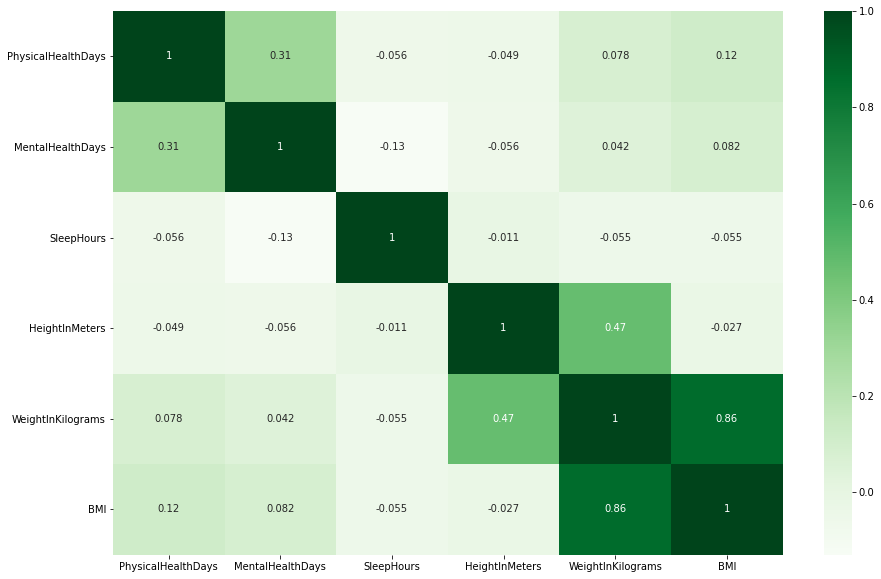

In [163]:
data_cont=data[cont_columns]
corr=data_cont.corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True ,ax=ax,cmap= 'Greens')


### Split and scale part

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import (KFold,StratifiedKFold)


X=data.drop("HadHeartAttack",axis=1)
y=data["HadHeartAttack"]

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.15,random_state=12345)


scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


### Cross Validation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

==== Depth 10 ====
==== Fold 0 ====
Accuracy is 0.9473986228003061 and AUC is 0.8861501233094777
==== Depth 10 ====
==== Fold 1 ====
Accuracy is 0.9485462892119357 and AUC is 0.8903453418338918
==== Depth 10 ====
==== Fold 2 ====
Accuracy is 0.9471595256312165 and AUC is 0.889480204488217
==== Depth 10 ====
==== Fold 3 ====
Accuracy is 0.9479233914353347 and AUC is 0.8873588100671093
==== Depth 10 ====
==== Fold 4 ====
Accuracy is 0.9475647371063769 and AUC is 0.8858747237038213
==== Depth 11 ====
==== Fold 0 ====
Accuracy is 0.9477811782708493 and AUC is 0.8865048761280115
==== Depth 11 ====
==== Fold 1 ====
Accuracy is 0.9482593726090283 and AUC is 0.8909833543278348
==== Depth 11 ====
==== Fold 2 ====
Accuracy is 0.9473508033664881 and AUC is 0.8893853195283412
==== Depth 11 ====
==== Fold 3 ====
Accuracy is 0.9485450589388614 and AUC is 0.8875866050629299
==== Depth 11 ====
==== Fold 4 ====
Accuracy is 0.94770819883796 and AUC is 0.8864685642130635
==== Depth 12 ====
==== Fold 0 ==

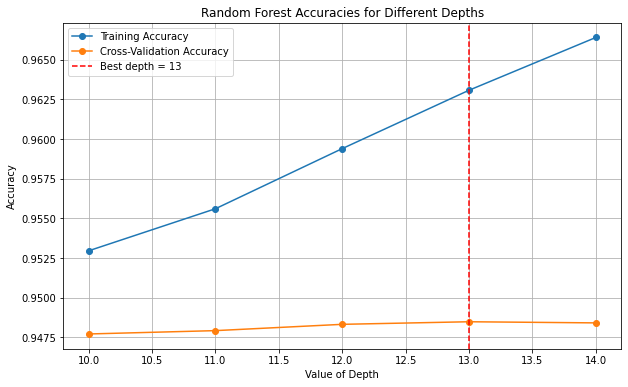

In [167]:

s_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

cv_scores = []
train_scores = []
roc_scores = []

for depth in range(10, 15):
    fold = 0  # Reset fold counter for each depth
    clf = RandomForestClassifier(max_depth=depth)
    
    fold_scores = []
    fold_scores_auc = []

    for train_idx, val_idx in s_kf.split(X_train, y_train):
        X_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]

        X_val = X_train.iloc[val_idx]
        y_val = y_train.iloc[val_idx]

        scaler = StandardScaler()
        X_train2_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        clf.fit(X_train2_scaled, y_tr)
        pred = clf.predict(X_val_scaled)
        pred_prob = clf.predict_proba(X_val_scaled)[:, 1]

        acc_score = accuracy_score(y_val, pred)
        auc_score = roc_auc_score(y_val, pred_prob)

        fold_scores.append(acc_score)
        fold_scores_auc.append(auc_score)
    
        print(f"==== Depth {depth} ====")
        print(f"==== Fold {fold} ====")
        print(f"Accuracy is {acc_score} and AUC is {auc_score}")
        fold += 1
    
    cv_scores.append(np.mean(fold_scores))
    roc_scores.append(np.mean(fold_scores_auc))
    
    # Fit on entire training set to calculate training accuracy
    
    clf.fit(X_train_scaled, y_train)
    y_train_pred = clf.predict(X_train_scaled)
    train_scores.append(accuracy_score(y_train, y_train_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(10, 15), train_scores, label='Training Accuracy', marker='o')
plt.plot(range(10, 15), cv_scores, label='Cross-Validation Accuracy', marker='o')

best_depth = np.argmax(cv_scores) + 10
plt.axvline(x=best_depth, color='r', linestyle='--', label=f'Best depth = {best_depth}')

plt.title('Random Forest Accuracies for Different Depths')
plt.xlabel('Value of Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Predictions and metrics on test data

In [9]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score)

Accuracy: 0.9485
AUC Score: 0.8863
Precision: 0.617
Recall: 0.148


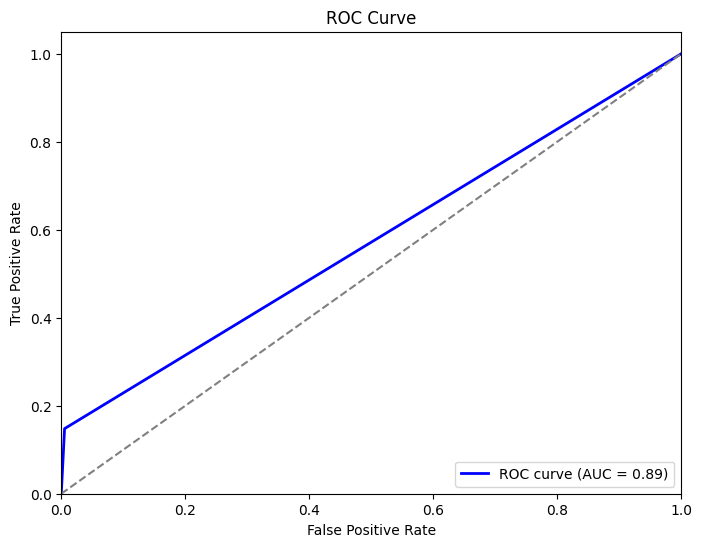

In [15]:
clf2 = RandomForestClassifier(max_depth=13)
clf2.fit(X_train_scaled,y_train)

y_preds=clf2.predict(X_test_scaled)
pred_prob_test = clf2.predict_proba(X_test_scaled)[:, 1]

accuracy_test = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy_test:.4f}")

auc_score_test = roc_auc_score(y_test, pred_prob_test)
print(f"AUC Score: {auc_score_test:.4f}")

print('Precision: %.3f' % precision_score(y_test, y_preds))
print('Recall: %.3f' % recall_score(y_test, y_preds))

#ROC-AUC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Make predictions on the test set and calculate probabilities
y_pred_proba = y_preds

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc_score_test

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

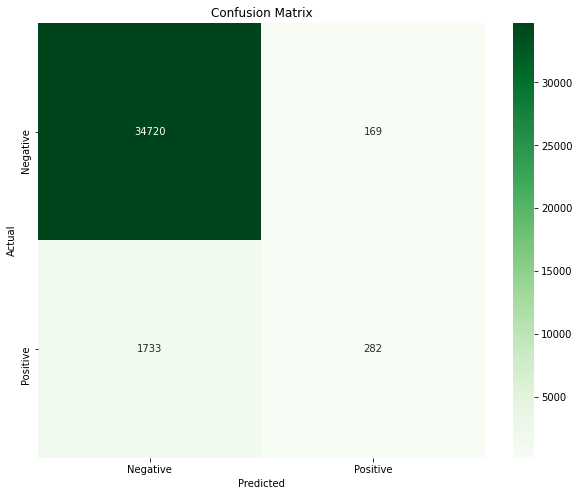

In [34]:
from sklearn.metrics import confusion_matrix

fig , ax = plt.subplots(figsize=(10 , 8))


conf_matrix = confusion_matrix(y_test, y_preds)

TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', ax=ax,xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

Average Accuracy: 0.9481
Average ROC AUC: 0.8859
Average Precision: 0.5562
Average Recall: 0.2424
Final Test Accuracy: 0.9484
Final Test ROC AUC: 0.8833
Final Test Precision: 0.5615
Final Test Recall: 0.2536


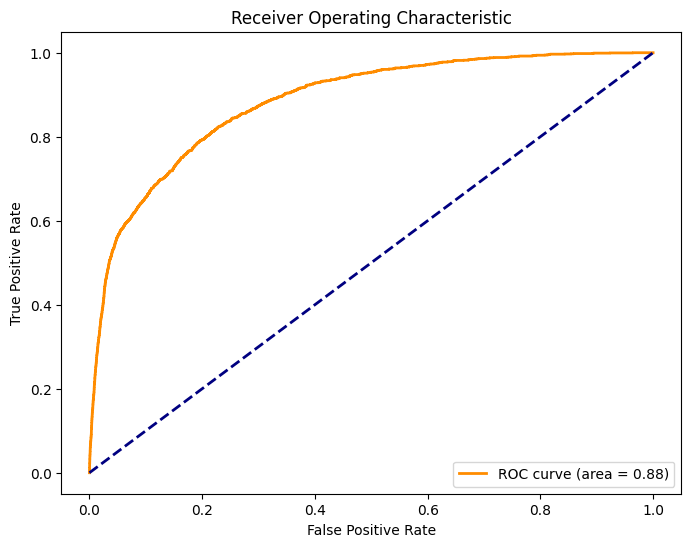

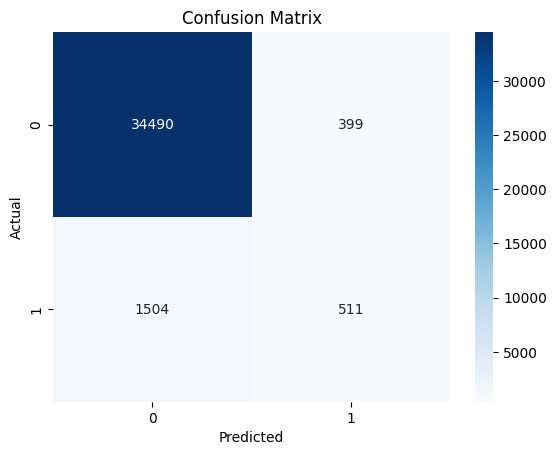

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# Create a logistic regression model
logistic_model = LogisticRegression()

# Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

# Lists to store metrics from each fold
accuracies = []
roc_aucs = []
precisions = []
recalls = []

# Loop over each fold
for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_kf, X_test_kf = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the logistic model
    logistic_model.fit(X_train_kf, y_train_kf)
    
    # Predict on test part of the fold
    y_pred_kf = logistic_model.predict(X_test_kf)
    y_prob_kf = logistic_model.predict_proba(X_test_kf)[:, 1]
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test_kf, y_pred_kf))
    roc_aucs.append(roc_auc_score(y_test_kf, y_prob_kf))
    precisions.append(precision_score(y_test_kf, y_pred_kf))
    recalls.append(recall_score(y_test_kf, y_pred_kf))

# Print average results from 5-fold cross-validation
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average ROC AUC: {np.mean(roc_aucs):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")

# Final model evaluation on the original test set
logistic_model.fit(X_train_scaled, y_train)
y_pred_final = logistic_model.predict(X_test_scaled)
y_prob_final = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Final metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_prob_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)

print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test ROC AUC: {final_roc_auc:.4f}")
print(f"Final Test Precision: {final_precision:.4f}")
print(f"Final Test Recall: {final_recall:.4f}")

# Plotting the ROC curve for the final model
fpr, tpr, _ = roc_curve(y_test, y_prob_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % final_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix for the final model
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix_final, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()